## ISTE - 793
## Project Checkpoint 1
## Topic - Predictive Analysis of Likes and Dislikes on YouTube Videos

### Name - Divya Khairnar

- Importing libraries

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

## Loading dataset

In [2]:
#US dataset

df_US = pd.read_csv("/Users/divyakhairnar/Documents/MS_ITA/Fall24/dataset/US_youtube_trending_data.csv")

#displaying first 5 rows of the dataset
df_US.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268787 entries, 0 to 268786
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           268787 non-null  object
 1   title              268787 non-null  object
 2   publishedAt        268787 non-null  object
 3   channelId          268787 non-null  object
 4   channelTitle       268787 non-null  object
 5   categoryId         268787 non-null  int64 
 6   trending_date      268787 non-null  object
 7   tags               268787 non-null  object
 8   view_count         268787 non-null  int64 
 9   likes              268787 non-null  int64 
 10  dislikes           268787 non-null  int64 
 11  comment_count      268787 non-null  int64 
 12  thumbnail_link     268787 non-null  object
 13  comments_disabled  268787 non-null  bool  
 14  ratings_disabled   268787 non-null  bool  
 15  description        264238 non-null  object
dtypes: bool(2), int64(5)

In [4]:
#India dataset

df_IN = pd.read_csv("/Users/divyakhairnar/Documents/MS_ITA/Fall24/dataset/IN_youtube_trending_data.csv")

#displaying first 5 rows of the dataset
df_IN.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12T04:31:41Z,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11T09:00:11Z,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11T07:30:02Z,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10T05:30:49Z,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11T05:30:13Z,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...


## Data cleaning

- Converting publishedAt to date time format for easy access [1]

In [5]:
# US dataset
df_US['publishedAt'] = pd.to_datetime(df_US['publishedAt'])

# India dataset
df_IN['publishedAt'] = pd.to_datetime(df_IN['publishedAt'])

In [6]:
# importing json file containing category id details

with open('/Users/divyakhairnar/Documents/MS_ITA/Fall24/dataset/category_id.json', 'r') as file:
    c1 = json.load(file)

#print(c1)


- Merging the csv and json file to display the category name [2]

In [7]:
# US dataset

categories = []
for item in c1['items']:
    category_id = item['id']
    category_name = item['snippet']['title']
    categories.append({'categoryId': int(category_id), 'category_name': category_name})

category_df = pd.DataFrame(categories)

df_US = pd.merge(df_US, category_df, on='categoryId', how='left')

df_US.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...,People & Blogs
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare...",Gaming
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...,Entertainment
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...,Music
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...,Howto & Style


In [8]:
# India dataset

categories = []
for item in c1['items']:
    category_id = item['id']
    category_name = item['snippet']['title']
    categories.append({'categoryId': int(category_id), 'category_name': category_name})

category_df = pd.DataFrame(categories)

df_IN = pd.merge(df_IN, category_df, on='categoryId', how='left')

df_IN.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description,category_name
0,Iot0eF6EoNA,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,UCGqvJPRcv7aVFun-eTsatcA,FoxStarHindi,24,2020-08-12T00:00:00Z,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,https://i.ytimg.com/vi/Iot0eF6EoNA/default.jpg,False,False,Three Streams. Three Stories. One Journey. Sta...,Entertainment
1,x-KbnJ9fvJc,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,UCm9SZAl03Rev9sFwloCdz1g,Rehaan Records,10,2020-08-12T00:00:00Z,[None],11308046,655450,33242,405146,https://i.ytimg.com/vi/x-KbnJ9fvJc/default.jpg,False,False,Singer/Lyrics: Karan Aujla Feat Tania Music/ D...,Music
2,KX06ksuS6Xo,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,UCZRdNleCgW-BGUJf-bbjzQg,Diljit Dosanjh,10,2020-08-12T00:00:00Z,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,https://i.ytimg.com/vi/KX06ksuS6Xo/default.jpg,False,False,CLASH official music video performed by DILJIT...,Music
3,UsMRgnTcchY,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10 05:30:49+00:00,UCq-Fj5jknLsUf-MWSy4_brA,T-Series,10,2020-08-12T00:00:00Z,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,https://i.ytimg.com/vi/UsMRgnTcchY/default.jpg,False,False,Gulshan Kumar and T-Series presents Bhushan Ku...,Music
4,WNSEXJJhKTU,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11 05:30:13+00:00,UCye6Oz0mg46S362LwARGVcA,VYRLOriginals,10,2020-08-12T00:00:00Z,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,https://i.ytimg.com/vi/WNSEXJJhKTU/default.jpg,False,False,VYRL Originals brings to you ‘Baarish’ - the b...,Music


In [9]:
df_IN.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251277 entries, 0 to 251276
Data columns (total 17 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   video_id           251277 non-null  object             
 1   title              251277 non-null  object             
 2   publishedAt        251277 non-null  datetime64[ns, UTC]
 3   channelId          251277 non-null  object             
 4   channelTitle       251276 non-null  object             
 5   categoryId         251277 non-null  int64              
 6   trending_date      251277 non-null  object             
 7   tags               251277 non-null  object             
 8   view_count         251277 non-null  int64              
 9   likes              251277 non-null  int64              
 10  dislikes           251277 non-null  int64              
 11  comment_count      251277 non-null  int64              
 12  thumbnail_link     251277 non-

- Deleting unnecessary columns

In [10]:
df_IN = df_IN.drop(['video_id', 'channelId','channelTitle','trending_date','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1)
print('Deletion complete')

Deletion complete


In [11]:
df_US = df_US.drop(['video_id', 'channelId','channelTitle','trending_date','thumbnail_link','comments_disabled','ratings_disabled','description'], axis=1)
print('Deletion complete')

Deletion complete


In [12]:
df_US.head()

,title,publishedAt,categoryId,tags,view_count,likes,dislikes,comment_count,category_name
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People & Blogs
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music
4,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,26,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,Howto & Style


In [13]:
# checking null values

print("Null values in US dataset:\n",df_US.isnull().sum())

print("\n\nNull values in India dataset:\n",df_US.isnull().sum())

Null values in US dataset:
 title            0
publishedAt      0
categoryId       0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64


Null values in India dataset:
 title            0
publishedAt      0
categoryId       0
tags             0
view_count       0
likes            0
dislikes         0
comment_count    0
category_name    0
dtype: int64


In [14]:
# checking for duplicate values

print("Duplicates values in US dataset:\n", {df_US.duplicated().sum()})

print("\n\nDuplicates values in US dataset:\n", {df_IN.duplicated().sum()})



Duplicates values in US dataset:
 {np.int64(124)}


Duplicates values in US dataset:
 {np.int64(88)}


In [15]:
# deleting duplicate data

df_US = df_US.drop_duplicates()
df_IN = df_IN.drop_duplicates()

print("Duplicates values in US dataset:\n", {df_US.duplicated().sum()})

print("\n\nDuplicates values in US dataset:\n", {df_IN.duplicated().sum()})

print("Duplicate data handled")

Duplicates values in US dataset:
 {np.int64(0)}


Duplicates values in US dataset:
 {np.int64(0)}
Duplicate data handled


In [16]:
# Count the number of records for each category in India dataset

category_counts_IN = df_IN['category_name'].value_counts()

print(category_counts_IN)

category_name
Entertainment            98230
People & Blogs           41068
Music                    32598
Comedy                   18151
Gaming                   14735
Howto & Style             8063
Science & Technology      7566
News & Politics           7535
Sports                    7304
Film & Animation          6475
Education                 5955
Travel & Events           1712
Autos & Vehicles          1597
Pets & Animals             110
Nonprofits & Activism       90
Name: count, dtype: int64


In [17]:
# Filter the DataFrame to keep only categories with count > 14000
df_IN = df_IN[df_IN['category_name'].map(df_IN['category_name'].value_counts()) > 14000]


print(df_IN['category_name'].value_counts())


category_name
Entertainment     98230
People & Blogs    41068
Music             32598
Comedy            18151
Gaming            14735
Name: count, dtype: int64


In [18]:
# Count the number of records for each category in USA dataset

category_counts_US = df_US['category_name'].value_counts()

print(category_counts_US)

category_name
Entertainment            53918
Gaming                   53224
Music                    43382
Sports                   31311
People & Blogs           22643
Comedy                   13181
Film & Animation         10890
News & Politics           9666
Science & Technology      8154
Howto & Style             7098
Education                 6654
Autos & Vehicles          5488
Travel & Events           1712
Pets & Animals            1222
Nonprofits & Activism      120
Name: count, dtype: int64


In [19]:
# Filter the DataFrame to keep only categories with count > 14000
df_US = df_US[df_US['category_name'].map(df_US['category_name'].value_counts()) > 14000]


print(df_US['category_name'].value_counts())

category_name
Entertainment     53918
Gaming            53224
Music             43382
Sports            31311
People & Blogs    22643
Name: count, dtype: int64


In [20]:
# Extracting additional features for US dataset

df_US['published_year'] = df_US['publishedAt'].dt.year
df_US['published_month'] = df_US['publishedAt'].dt.month
df_US['published_day'] = df_US['publishedAt'].dt.day
df_US['published_dayofweek'] = df_US['publishedAt'].dt.dayofweek 
df_US['published_hour'] = df_US['publishedAt'].dt.hour

# Identifing if its weekend or weekday, considering Monday as 0 and Sunday as 6
df_US['is_weekend'] = df_US['published_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df_US.head()




,title,publishedAt,categoryId,tags,view_count,likes,dislikes,comment_count,category_name,published_year,published_month,published_day,published_dayofweek,published_hour,is_weekend
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,22,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,People & Blogs,2020,8,11,1,19,0
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,20,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,Gaming,2020,8,11,1,17,0
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,24,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,Entertainment,2020,8,11,1,16,0
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,10,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,Music,2020,8,11,1,16,0
5,I Haven't Been Honest About My Injury.. Here's...,2020-08-11 20:00:04+00:00,24,Professor injury|professor achilles|professor ...,949491,77487,746,7506,Entertainment,2020,8,11,1,20,0


In [21]:
# Extracting additional features for India dataset

df_IN['published_year'] = df_IN['publishedAt'].dt.year
df_IN['published_month'] = df_IN['publishedAt'].dt.month
df_IN['published_day'] = df_IN['publishedAt'].dt.day
df_IN['published_dayofweek'] = df_IN['publishedAt'].dt.dayofweek 
df_IN['published_hour'] = df_IN['publishedAt'].dt.hour

# Identifing if its weekend or weekday, considering Monday as 0 and Sunday as 6
df_IN['is_weekend'] = df_IN['published_dayofweek'].apply(lambda x: 1 if x >= 5 else 0)

df_IN.head()


,title,publishedAt,categoryId,tags,view_count,likes,dislikes,comment_count,category_name,published_year,published_month,published_day,published_dayofweek,published_hour,is_weekend
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,24,sadak|sadak 2|mahesh bhatt|vishesh films|pooja...,9885899,224925,3979409,350210,Entertainment,2020,8,12,2,4,0
1,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,10,[None],11308046,655450,33242,405146,Music,2020,8,11,1,9,0
2,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,10,clash diljit dosanjh|diljit dosanjh|diljit dos...,9140911,296533,6179,30058,Music,2020,8,11,1,7,0
3,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10 05:30:49+00:00,10,hindi songs|2020 hindi songs|2020 new songs|t-...,23564512,743931,84162,136942,Music,2020,8,10,0,5,0
4,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11 05:30:13+00:00,10,VYRL Original|Mohsin Khan|Shivangi Joshi|Payal...,6783649,268817,8798,22984,Music,2020,8,11,1,5,0


In [22]:
df_IN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204782 entries, 0 to 251275
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                204782 non-null  object             
 1   publishedAt          204782 non-null  datetime64[ns, UTC]
 2   categoryId           204782 non-null  int64              
 3   tags                 204782 non-null  object             
 4   view_count           204782 non-null  int64              
 5   likes                204782 non-null  int64              
 6   dislikes             204782 non-null  int64              
 7   comment_count        204782 non-null  int64              
 8   category_name        204782 non-null  object             
 9   published_year       204782 non-null  int32              
 10  published_month      204782 non-null  int32              
 11  published_day        204782 non-null  int32              
 12  publish

## Exploratory Data Analysis (EDA)

- View Count vs Likes scatter plot [3]

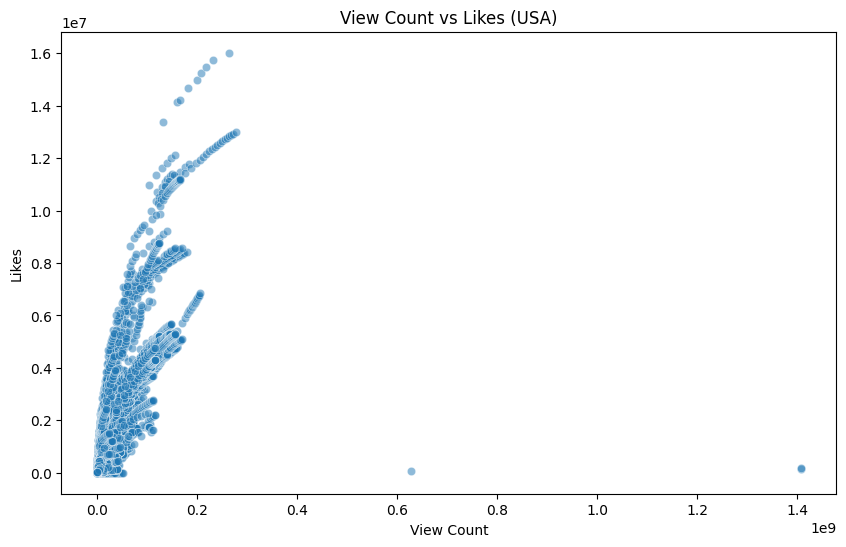

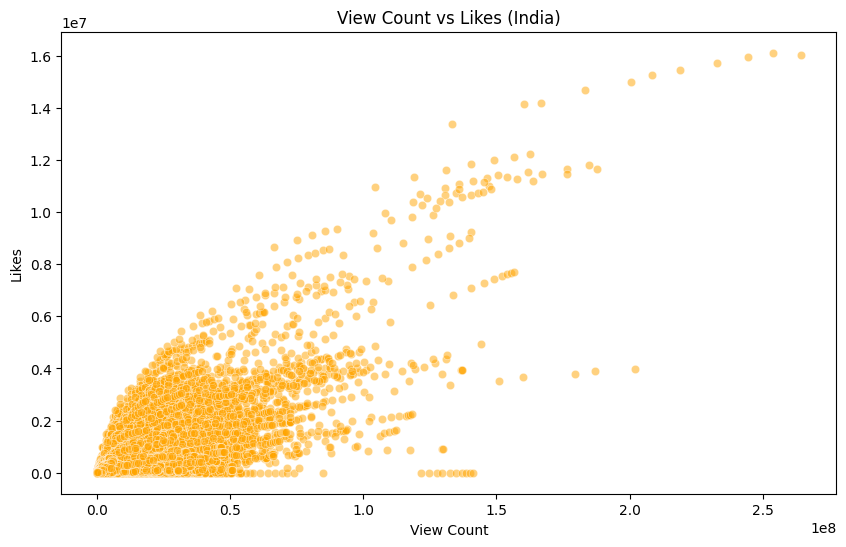

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='likes', data=df_US, alpha=0.5)
plt.title('View Count vs Likes (USA)')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='likes', color='orange', data=df_IN, alpha=0.5)
plt.title('View Count vs Likes (India)')
plt.xlabel('View Count')
plt.ylabel('Likes')
plt.show()


- View Count vs Dislikes scatter plot [3]

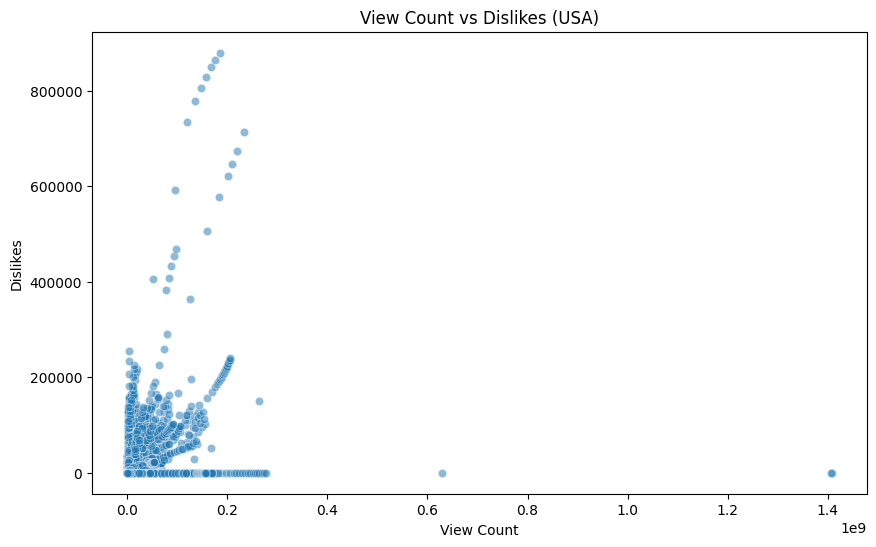

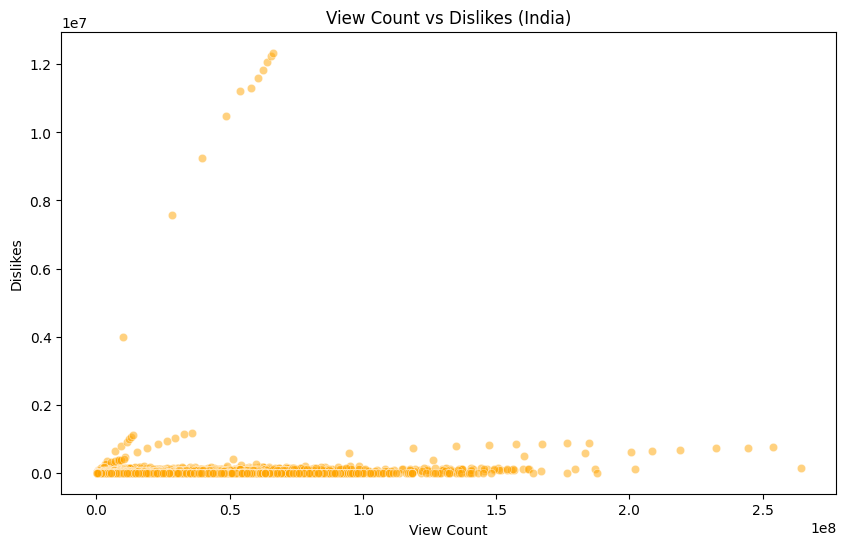

In [24]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='dislikes', data=df_US, alpha=0.5)
plt.title('View Count vs Dislikes (USA)')
plt.xlabel('View Count')
plt.ylabel('Dislikes')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='dislikes', color='orange', data=df_IN, alpha=0.5)
plt.title('View Count vs Dislikes (India)')
plt.xlabel('View Count')
plt.ylabel('Dislikes')
plt.show()

- View Count vs Comment Count scatter plot

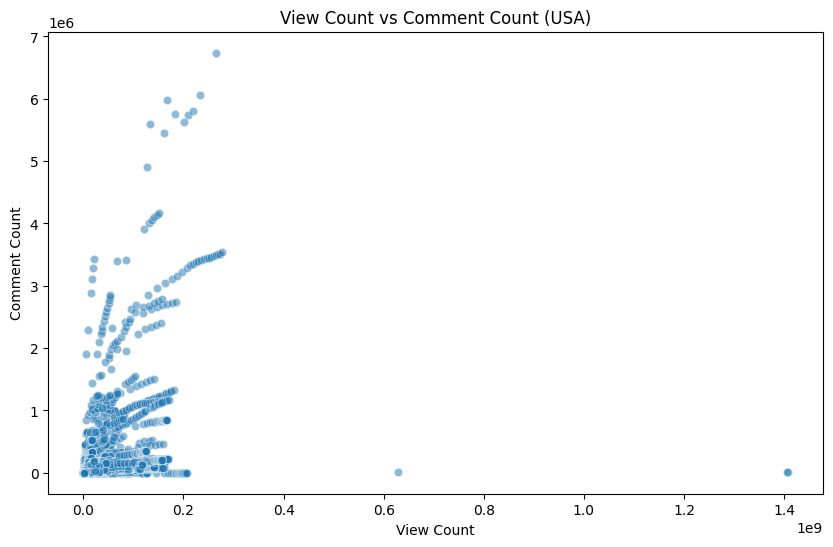

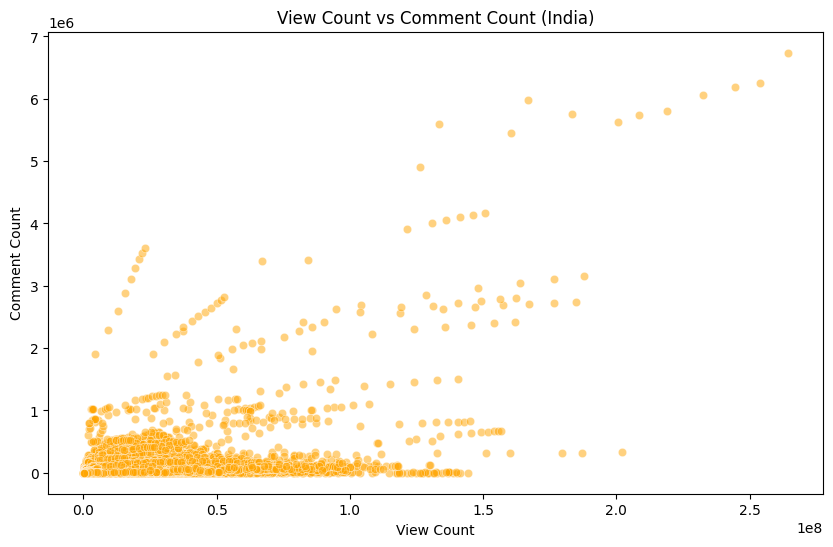

In [25]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='comment_count', data=df_US, alpha=0.5)
plt.title('View Count vs Comment Count (USA)')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='view_count', y='comment_count', color= 'orange', data=df_IN, alpha=0.5)
plt.title('View Count vs Comment Count (India)')
plt.xlabel('View Count')
plt.ylabel('Comment Count')
plt.show()


- Dislikes vs Likes scatter plot [3]

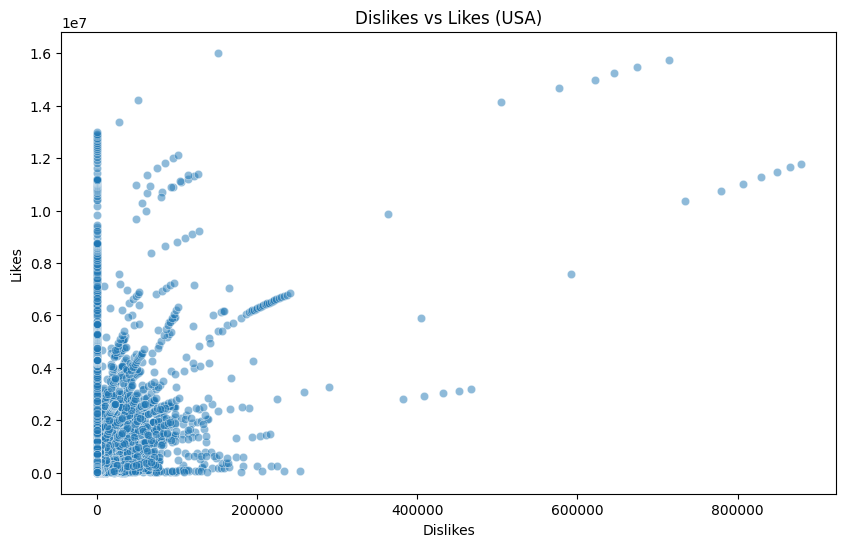

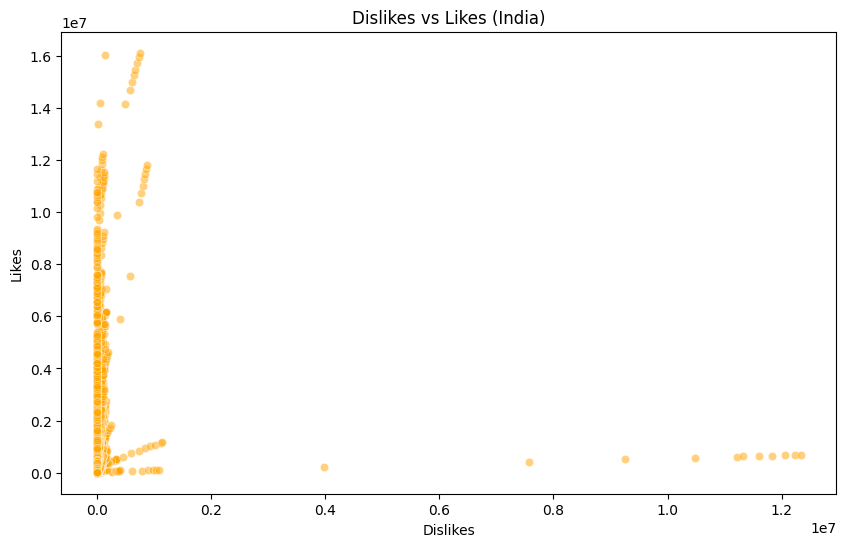

In [26]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='dislikes', y='likes', data=df_US, alpha=0.5)
plt.title('Dislikes vs Likes (USA)')
plt.xlabel('Dislikes')
plt.ylabel('Likes')
plt.show()

plt.figure(figsize=(10,6))
sns.scatterplot(x='dislikes', y='likes', color='orange', data=df_IN, alpha=0.5)
plt.title('Dislikes vs Likes (India)')
plt.xlabel('Dislikes')
plt.ylabel('Likes')
plt.show()

- Studying distribution across each category

In [27]:
# Count the number of records for each category in USA dataset

category_counts_US = df_US['category_name'].value_counts()

print(category_counts_US)

category_name
Entertainment     53918
Gaming            53224
Music             43382
Sports            31311
People & Blogs    22643
Name: count, dtype: int64


- Bar chart to display the record count for each category

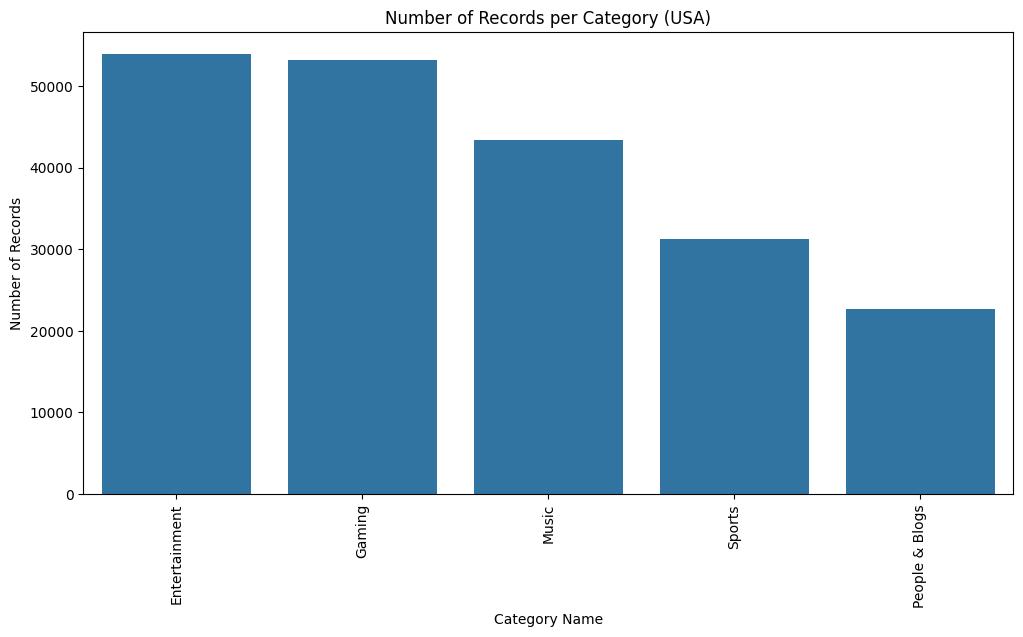

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts_US.index, y=category_counts_US.values)
plt.xticks(rotation=90)
plt.title('Number of Records per Category (USA)')
plt.xlabel('Category Name')
plt.ylabel('Number of Records')
plt.show()

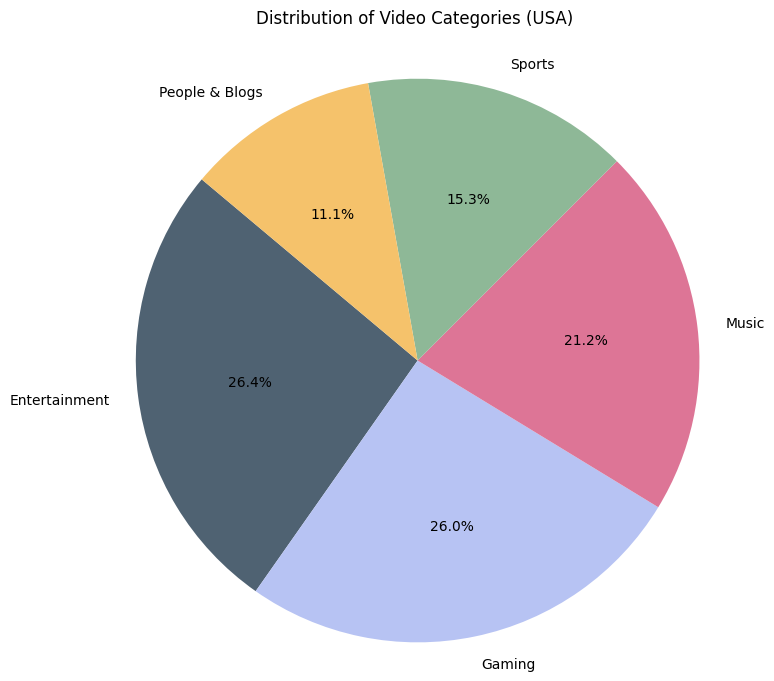

In [29]:
plt.figure(figsize=(8, 8))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#F5C26B']
plt.pie(category_counts_US, labels=category_counts_US.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Video Categories (USA) \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [30]:
# Count the number of records for each category in India dataset

category_counts_IN = df_IN['category_name'].value_counts()

print(category_counts_IN)

category_name
Entertainment     98230
People & Blogs    41068
Music             32598
Comedy            18151
Gaming            14735
Name: count, dtype: int64


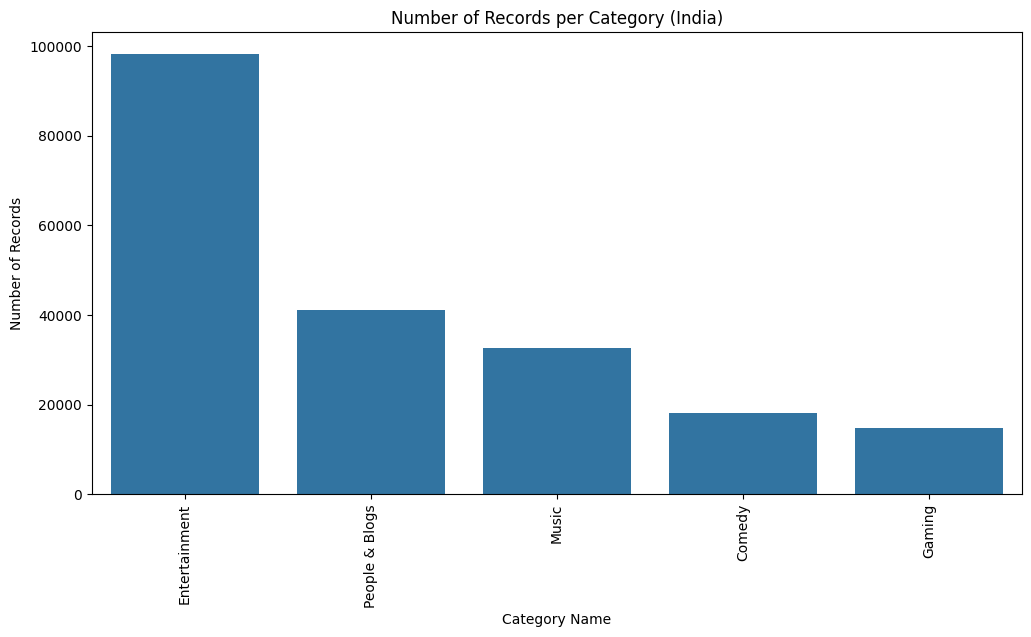

In [31]:
# Create a bar chart to display the record count for each category

plt.figure(figsize=(12, 6))
sns.barplot(x=category_counts_IN.index, y=category_counts_IN.values)
plt.xticks(rotation=90)
plt.title('Number of Records per Category (India)')
plt.xlabel('Category Name')
plt.ylabel('Number of Records')
plt.show()

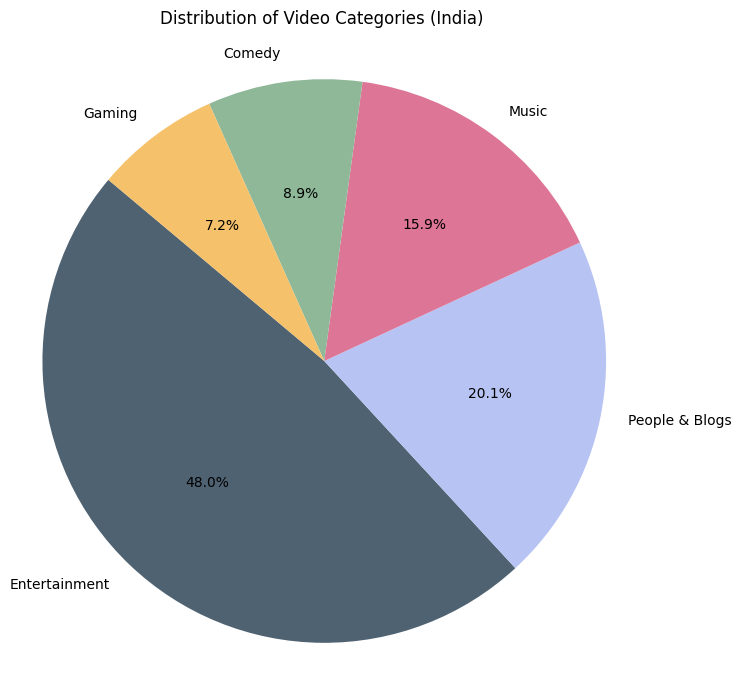

In [32]:
plt.figure(figsize=(8, 8))
colors = ['#4F6272', '#B7C3F3', '#DD7596', '#8EB897','#F5C26B']
plt.pie(category_counts_IN, labels=category_counts_IN.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribution of Video Categories (India) \n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


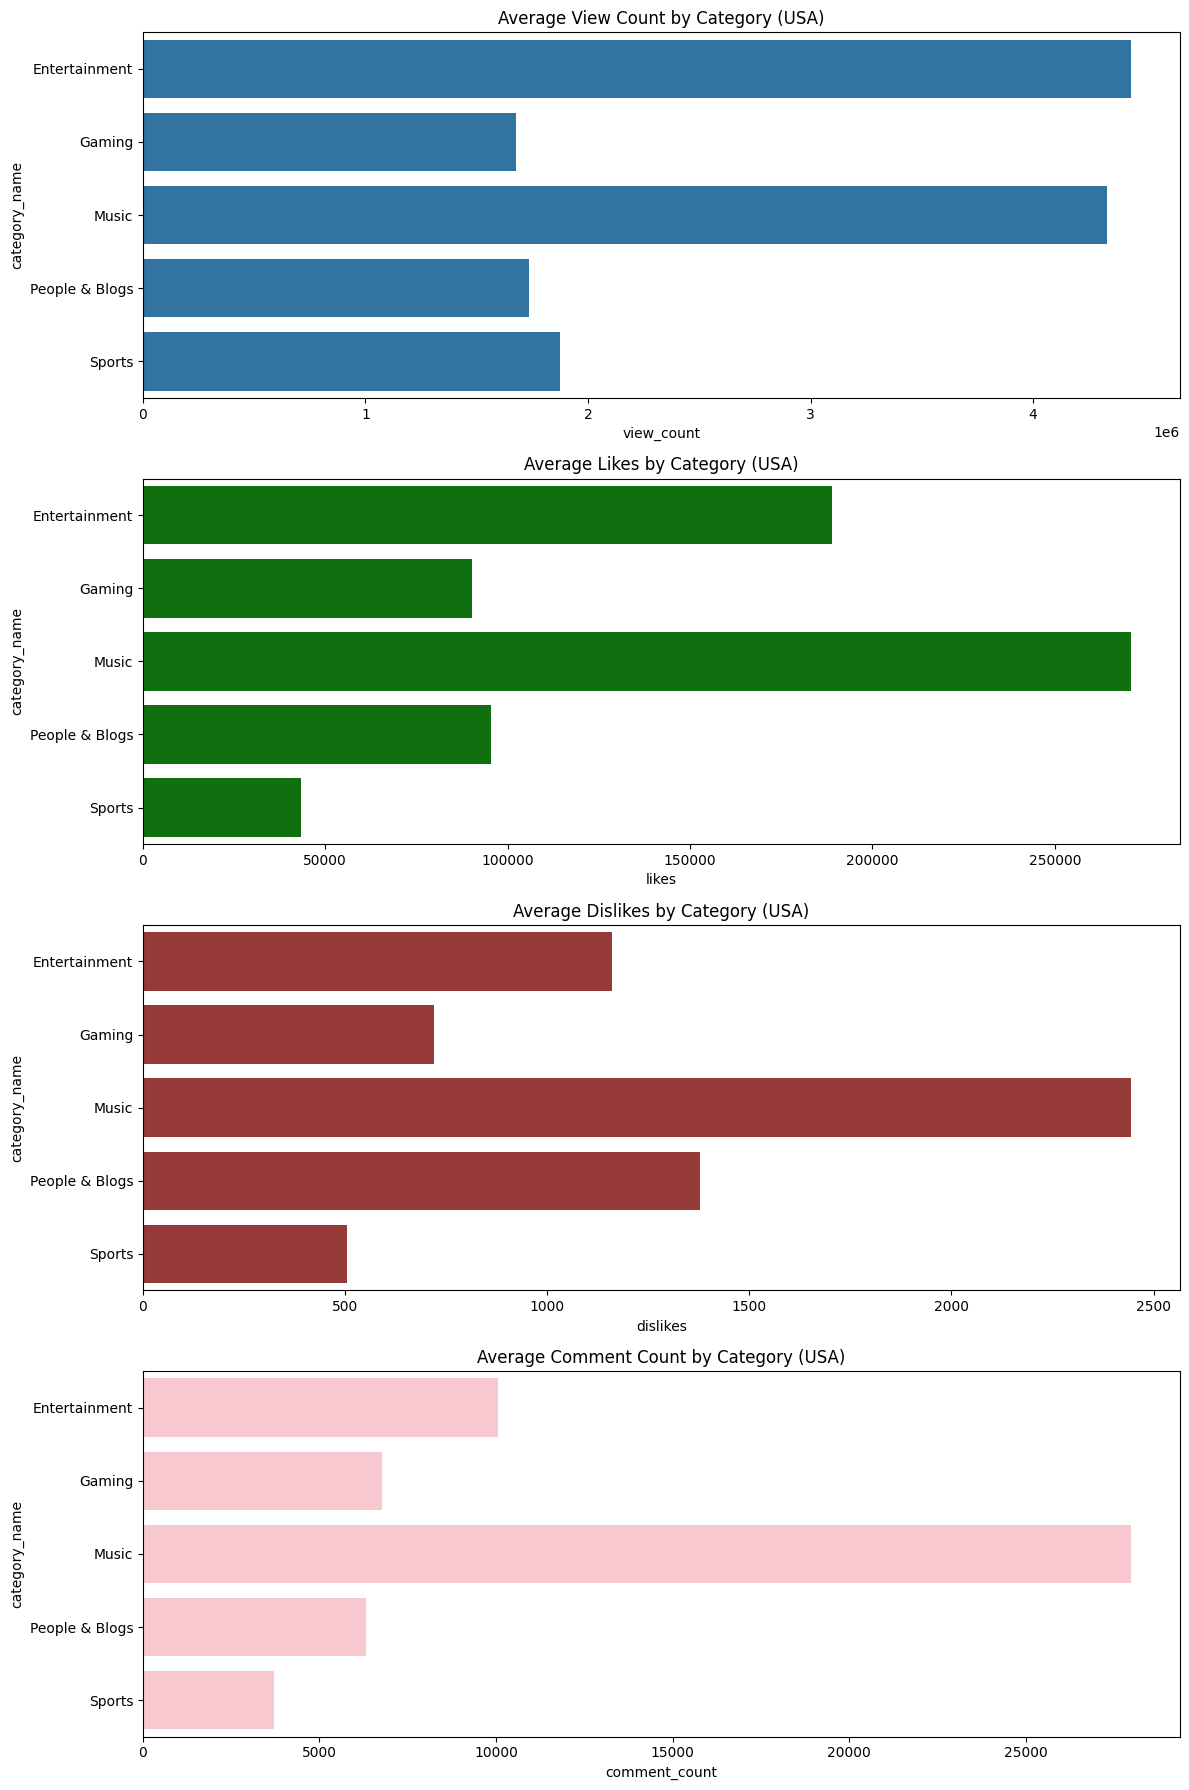

In [33]:
# Average views, likes, and comments by category for US dataset [5] [7]

df_grouped_US = df_US.groupby('category_name')[['view_count', 'likes', 'dislikes', 'comment_count']].mean().reset_index()

fig, axes = plt.subplots(4, 1, figsize=(12, 18))

sns.barplot(x='view_count', y='category_name', data=df_grouped_US, ax=axes[0])
axes[0].set_title('Average View Count by Category (USA)')

sns.barplot(x='likes', y='category_name', data=df_grouped_US, ax=axes[1], color='green')
axes[1].set_title('Average Likes by Category (USA)')

sns.barplot(x='dislikes', y='category_name', data=df_grouped_US, ax=axes[2], color='brown')
axes[2].set_title('Average Dislikes by Category (USA)')

sns.barplot(x='comment_count', y='category_name', data=df_grouped_US, ax=axes[3], color='pink')
axes[3].set_title('Average Comment Count by Category (USA)')

plt.tight_layout()
plt.show()

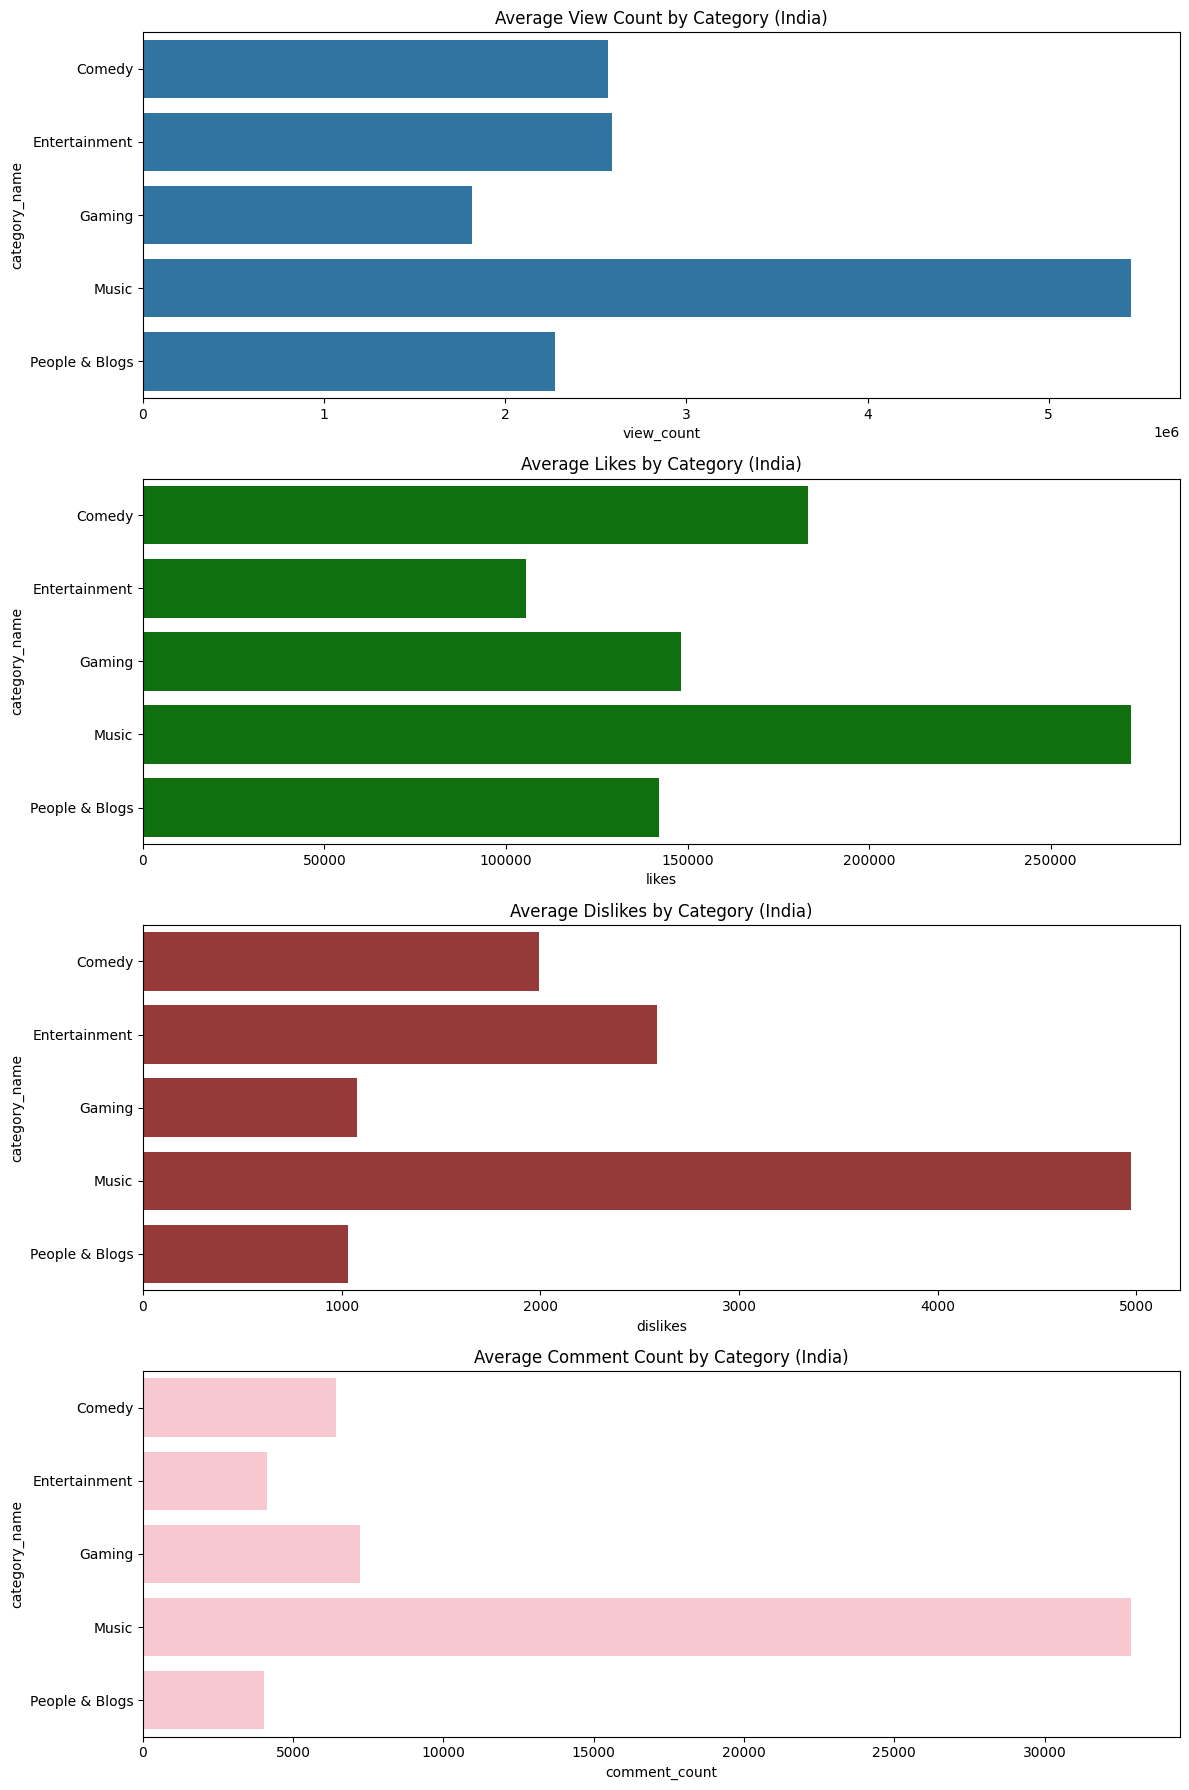

In [34]:
# Average views, likes, and comments by category for India dataset [5] [7]

df_grouped_IN = df_IN.groupby('category_name')[['view_count', 'likes', 'dislikes', 'comment_count']].mean().reset_index()

fig, axes = plt.subplots(4, 1, figsize=(12, 18))

sns.barplot(x='view_count', y='category_name', data=df_grouped_IN, ax=axes[0])
axes[0].set_title('Average View Count by Category (India)')

sns.barplot(x='likes', y='category_name', data=df_grouped_IN, ax=axes[1], color='green')
axes[1].set_title('Average Likes by Category (India)')

sns.barplot(x='dislikes', y='category_name', data=df_grouped_IN, ax=axes[2], color='brown')
axes[2].set_title('Average Dislikes by Category (India)')

sns.barplot(x='comment_count', y='category_name', data=df_grouped_IN, ax=axes[3], color='pink')
axes[3].set_title('Average Comment Count by Category (India)')

plt.tight_layout()
plt.show()

- Studying video engagement such as likes, dislikes, views over time [4] [5]

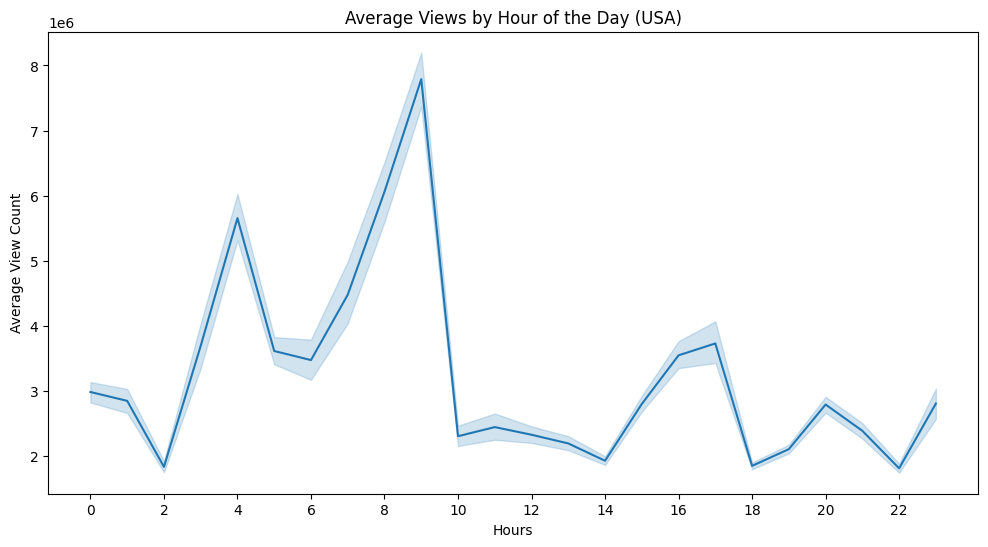

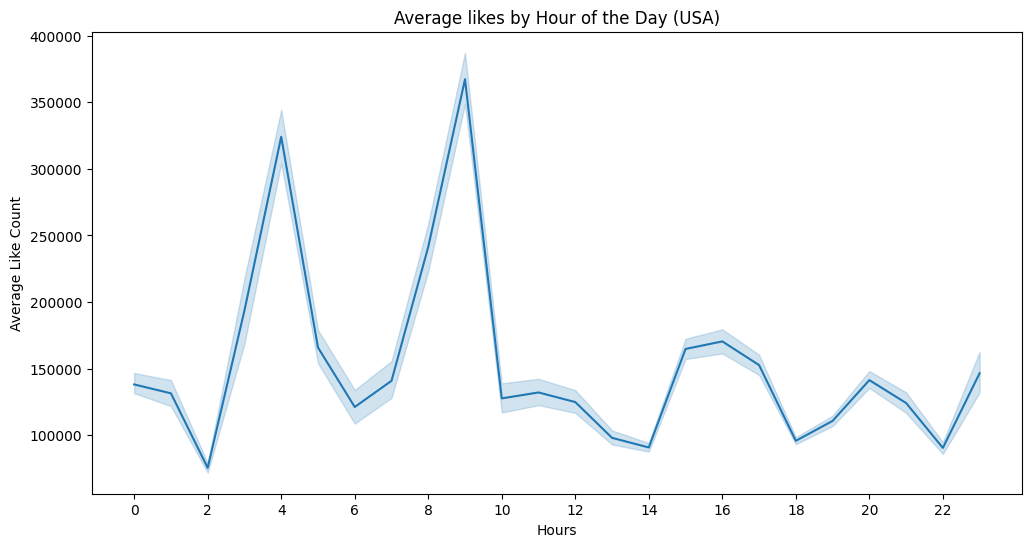

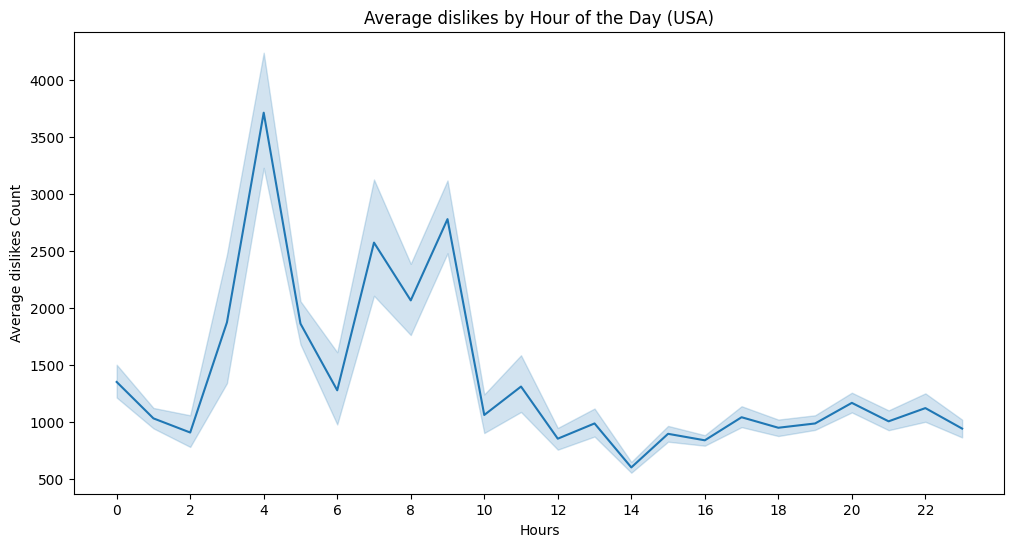

In [35]:
# Engagement plot for US

plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='view_count', data=df_US)
plt.title('Average Views by Hour of the Day (USA)')
plt.xlabel('Hours')
plt.ylabel('Average View Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='likes', data=df_US)
plt.title('Average likes by Hour of the Day (USA)')
plt.xlabel('Hours')
plt.ylabel('Average Like Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='dislikes', data=df_US)
plt.title('Average dislikes by Hour of the Day (USA)')
plt.xlabel('Hours')
plt.ylabel('Average dislikes Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()



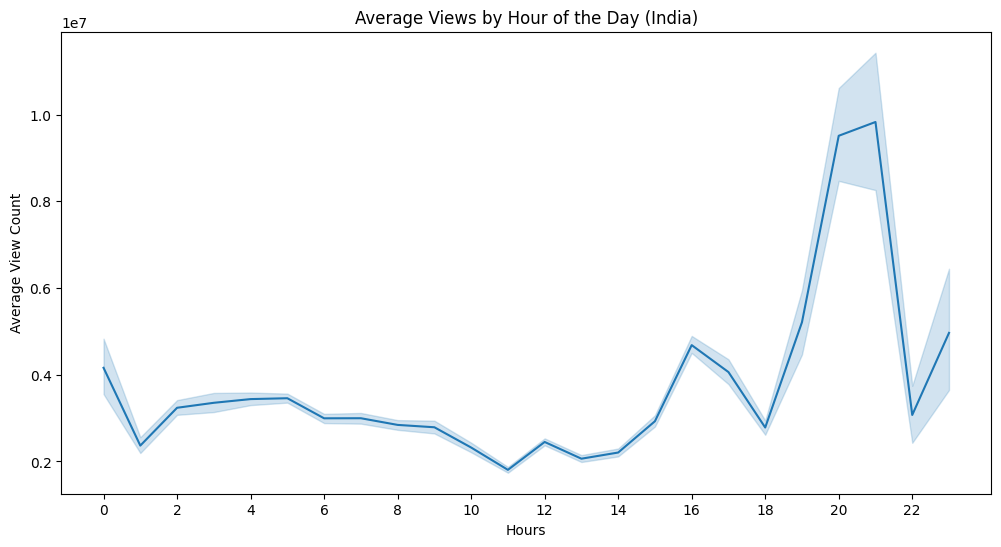

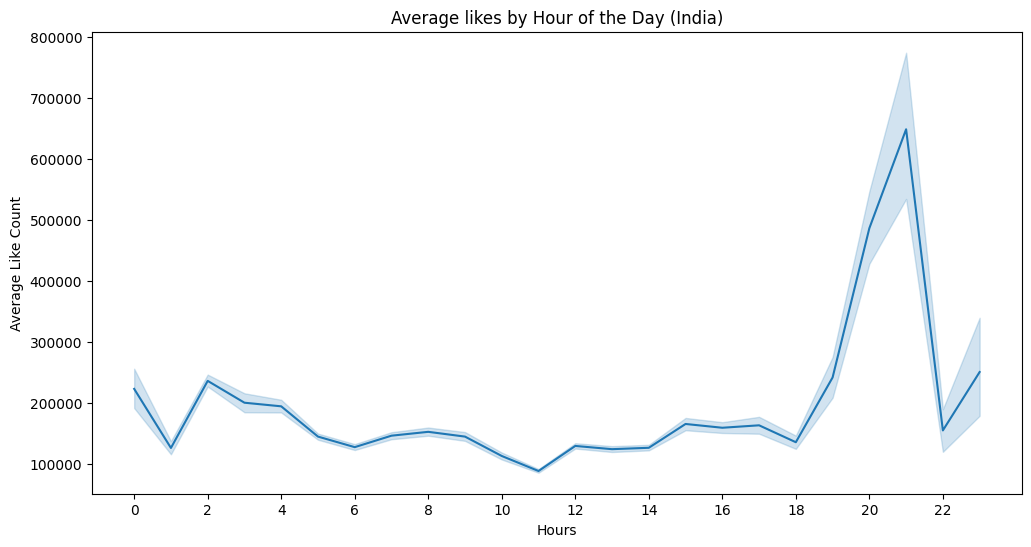

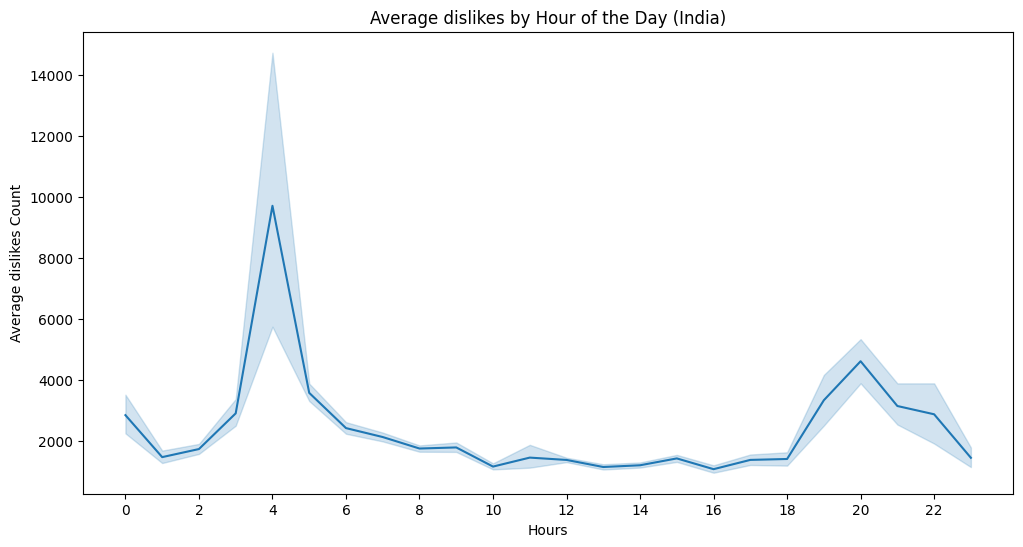

In [36]:
# Engagement plot for India


plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='view_count', data=df_IN)
plt.title('Average Views by Hour of the Day (India)')
plt.xlabel('Hours')
plt.ylabel('Average View Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='likes', data=df_IN)
plt.title('Average likes by Hour of the Day (India)')
plt.xlabel('Hours')
plt.ylabel('Average Like Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

plt.figure(figsize=(12,6))
sns.lineplot(x='published_hour', y='dislikes', data=df_IN)
plt.title('Average dislikes by Hour of the Day (India)')
plt.xlabel('Hours')
plt.ylabel('Average dislikes Count')
plt.xticks(ticks=range(0, 24, 2))
plt.show()

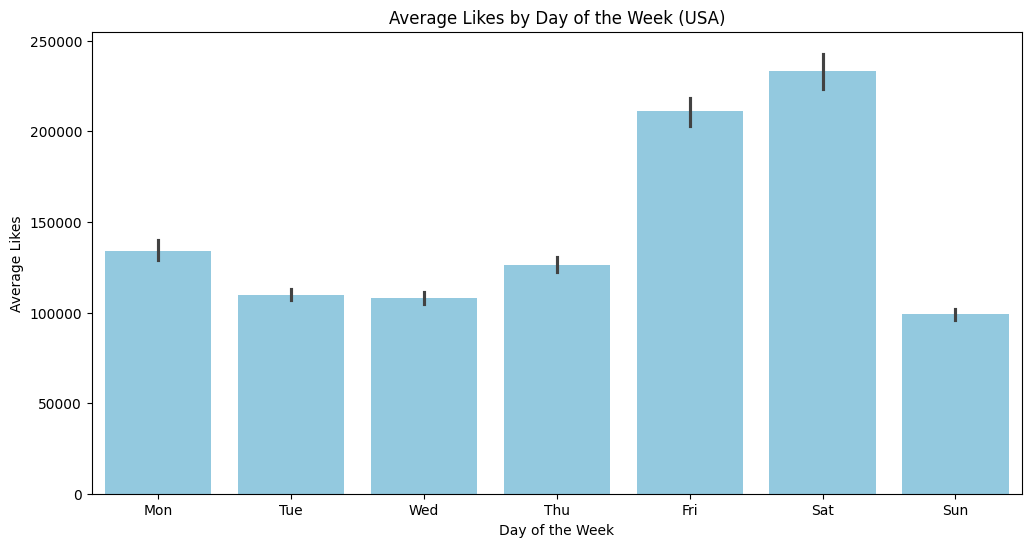

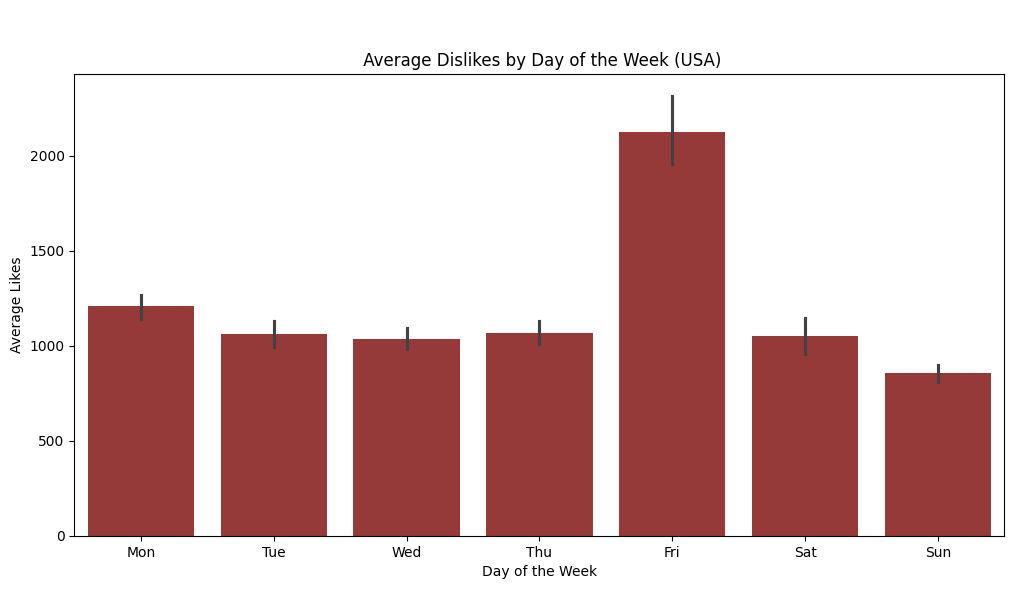

In [37]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_US, x='published_dayofweek', y='likes', estimator='mean', color='skyblue')
plt.title('Average Likes by Day of the Week (USA)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_US, x='published_dayofweek', y='dislikes', estimator='mean', color='brown')
plt.title('\n\n Average Dislikes by Day of the Week (USA)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

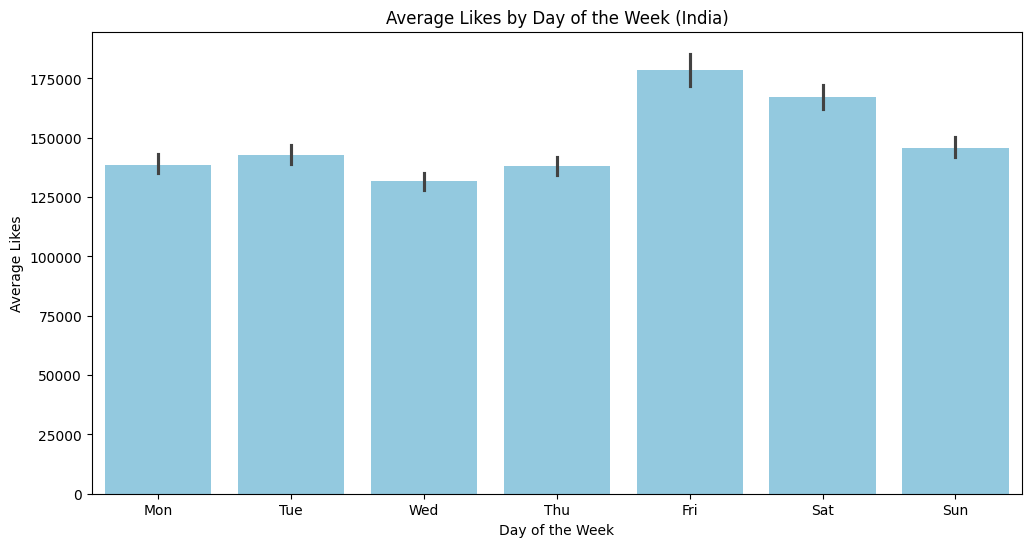

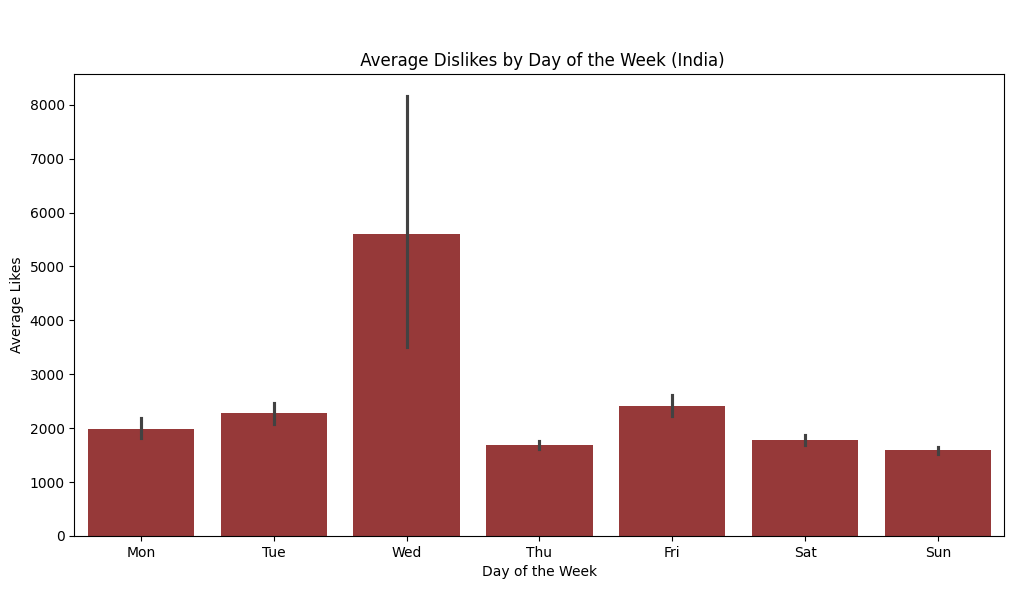

In [38]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df_IN, x='published_dayofweek', y='likes', estimator='mean', color='skyblue')
plt.title('Average Likes by Day of the Week (India)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(data=df_IN, x='published_dayofweek', y='dislikes', estimator='mean', color='brown')
plt.title('\n\n Average Dislikes by Day of the Week (India)')
plt.xlabel('Day of the Week')
plt.ylabel('Average Likes')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

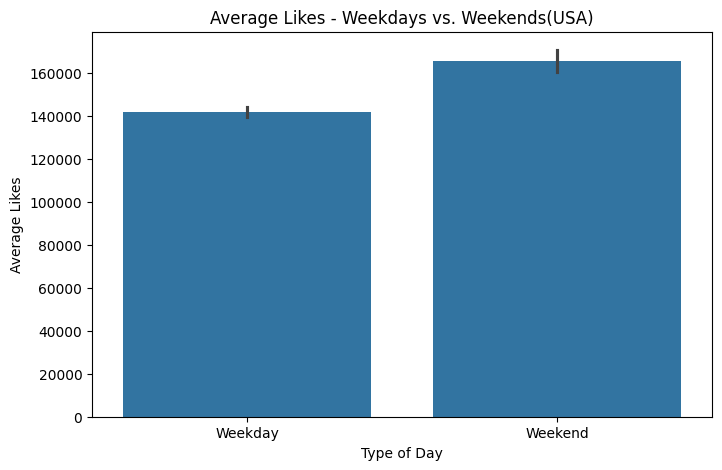

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_US, x='is_weekend', y='likes', estimator='mean')
plt.title('Average Likes - Weekdays vs. Weekends(USA)')
plt.xlabel('Type of Day')
plt.ylabel('Average Likes')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()


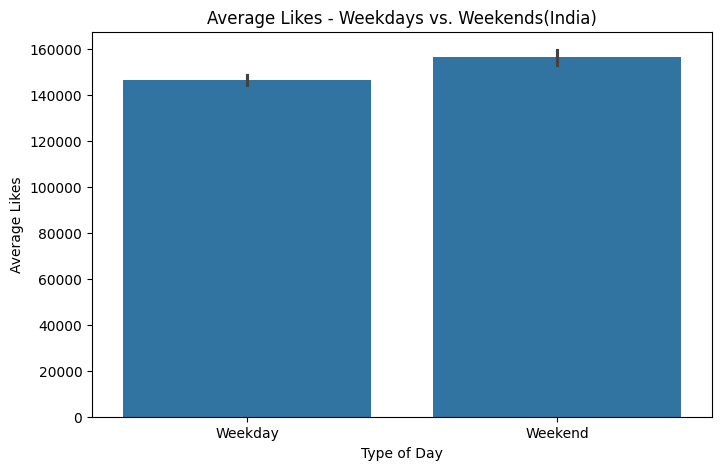

In [40]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_IN, x='is_weekend', y='likes', estimator='mean')
plt.title('Average Likes - Weekdays vs. Weekends(India)')
plt.xlabel('Type of Day')
plt.ylabel('Average Likes')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()

- Correlation Heatmap Between Numerical Features [6]

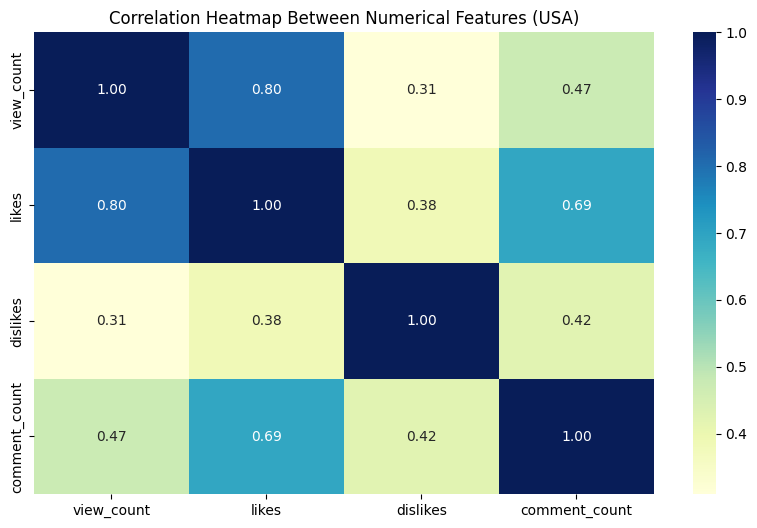

In [41]:
# Heatmap for US dataset

plt.figure(figsize=(10,6))
corr_matrix = df_US[['view_count', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Features (USA)')
plt.show()


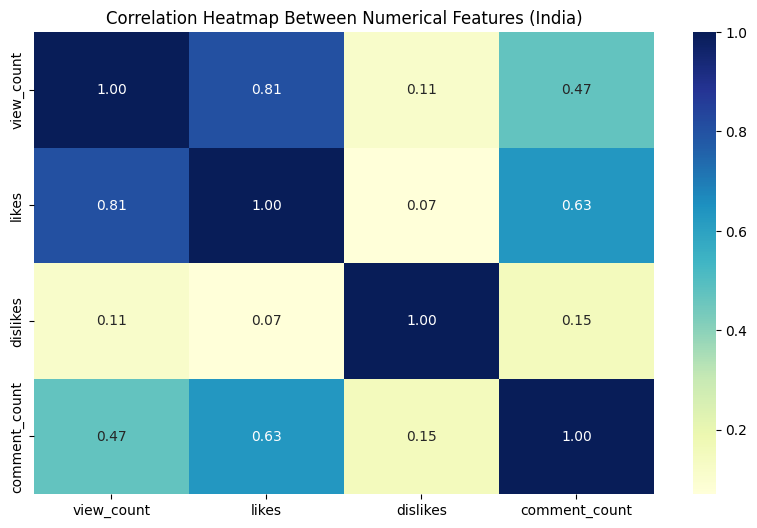

In [42]:
# Heatmap for India dataset

plt.figure(figsize=(10,6))
corr_matrix = df_IN[['view_count', 'likes', 'dislikes', 'comment_count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt='.2f')
plt.title('Correlation Heatmap Between Numerical Features (India)')
plt.show()

## Text processing [8]

- Text cleaning

In [43]:
def clean(text):
    if pd.isna(text):
        return ''  
    
    text = ' '.join(text.split('|'))
    text = re.sub("\'", "", text)   
    text = re.sub("[^a-zA-Z]", " ", text)  
    text = ' '.join(text.split())   
    text = text.lower()   
    return text

# Clean the tags column for both countries

df_US['tags'] = df_US['tags'].apply(lambda x: clean(x))
df_IN['tags'] = df_IN['tags'].apply(lambda x: clean(x))

In [44]:
df_US['tags']

0         brawadis prank basketball skits ghost funny vi...
1         apex legends apex legends characters new apex ...
2         jacksepticeye funny funny meme memes jacksepti...
3         xxl freshman xxl freshmen xxl freshman freshma...
5         professor injury professor achilles professor ...
                                ...                        
268779    doja cat feat teezo touchdown masc s claude do...
268781    sfm animation skibidi toilet vs cameramen skib...
268783                                                 none
268784            japan cdawgva abroad in japan trash taste
268785    gym youtube bodybuilder powerlifter vlog vlogg...
Name: tags, Length: 204478, dtype: object

In [45]:
df_IN['tags']

0         sadak sadak mahesh bhatt vishesh films pooja b...
1                                                      none
2         clash diljit dosanjh diljit dosanjh diljit dos...
3         hindi songs hindi songs new songs t series tse...
4         vyrl original mohsin khan shivangi joshi payal...
                                ...                        
251268    film companion anupama chopra anupama chopra i...
251269    bollywood songs hindi songs full hd video tips...
251272    tips telugu hanuman chalisa hanuman telugu mov...
251274             comicverse comic verse comicverse marvel
251275    daily vlogs comedy vlogs lifestyle vlogs daily...
Name: tags, Length: 204782, dtype: object

- Word cloud for tags attribute [9]

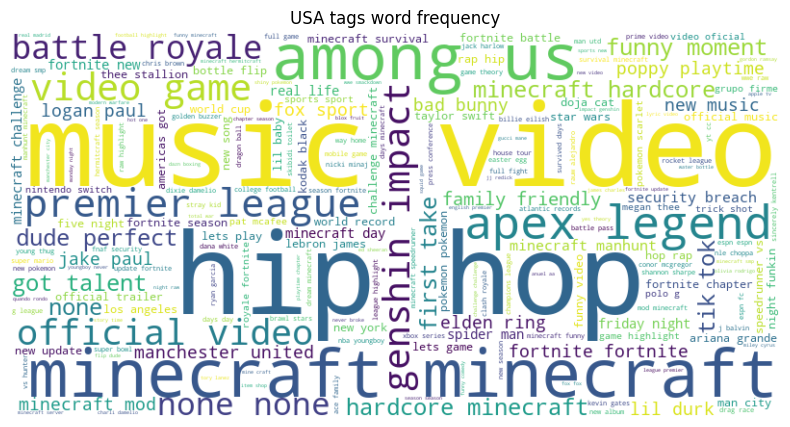

In [46]:
# Word cloud for USA

all_tags_US = ' '.join(df_US['tags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags_US)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('USA tags word frequency')
plt.axis('off')  
plt.show()

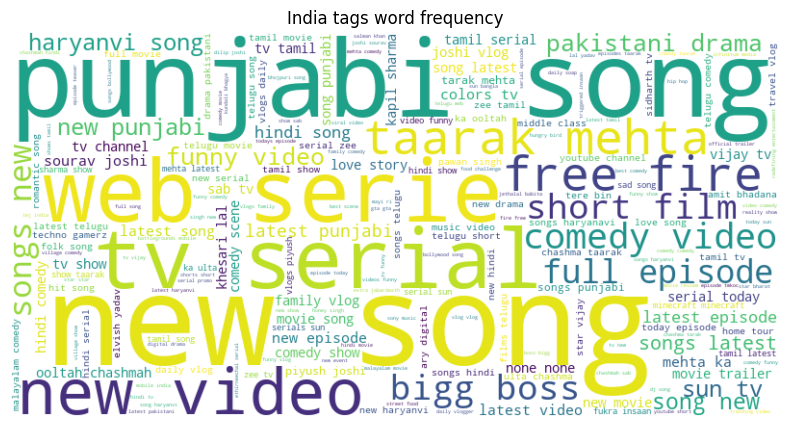

In [47]:
# Word cloud for India

all_tags_IN = ' '.join(df_IN['tags'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tags_IN)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('India tags word frequency')
plt.axis('off') 
plt.show()

In [48]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [49]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
import pandas as pd

# Download VADER lexicon if not already downloaded
nltk.download('vader_lexicon')

# Initialize the sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define a function to calculate the sentiment score of tags
def get_tag_sentiment(tags):
    # Calculate sentiment for each tag and take an average
    tags_str = str(tags)
    sentiment_scores = [sid.polarity_scores(tag)['compound'] for tag in tags_str.split('|')]
    return sum(sentiment_scores) / len(sentiment_scores) if sentiment_scores else 0  # average sentiment

# Apply the function to get a sentiment score for each video's tags
df_US['sentiment_score'] = df_US['tags'].apply(get_tag_sentiment)

df_US.head()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/divyakhairnar/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


,title,publishedAt,categoryId,tags,view_count,likes,dislikes,comment_count,category_name,published_year,published_month,published_day,published_dayofweek,published_hour,is_weekend,sentiment_score
0,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,22,brawadis prank basketball skits ghost funny vi...,1514614,156908,5855,35313,People & Blogs,2020,8,11,1,19,0,0.2263
1,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,20,apex legends apex legends characters new apex ...,2381688,146739,2794,16549,Gaming,2020,8,11,1,17,0,-0.5574
2,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,24,jacksepticeye funny funny meme memes jacksepti...,2038853,353787,2628,40221,Entertainment,2020,8,11,1,16,0,0.9522
3,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,10,xxl freshman xxl freshmen xxl freshman freshma...,496771,23251,1856,7647,Music,2020,8,11,1,16,0,0.0000
5,I Haven't Been Honest About My Injury.. Here's...,2020-08-11 20:00:04+00:00,24,professor injury professor achilles professor ...,949491,77487,746,7506,Entertainment,2020,8,11,1,20,0,-0.8126


In [50]:
df_US.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204478 entries, 0 to 268785
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                204478 non-null  object             
 1   publishedAt          204478 non-null  datetime64[ns, UTC]
 2   categoryId           204478 non-null  int64              
 3   tags                 204478 non-null  object             
 4   view_count           204478 non-null  int64              
 5   likes                204478 non-null  int64              
 6   dislikes             204478 non-null  int64              
 7   comment_count        204478 non-null  int64              
 8   category_name        204478 non-null  object             
 9   published_year       204478 non-null  int32              
 10  published_month      204478 non-null  int32              
 11  published_day        204478 non-null  int32              
 12  publish

In [51]:
df_US.to_csv('/Users/divyakhairnar/Documents/MS_ITA/Fall24/dataset/clean/df_US.csv', index=False) 

In [52]:
# Apply the function to get a sentiment score for each video's tags (India)
df_IN['sentiment_score'] = df_IN['tags'].apply(get_tag_sentiment)

df_IN.head()

,title,publishedAt,categoryId,tags,view_count,likes,dislikes,comment_count,category_name,published_year,published_month,published_day,published_dayofweek,published_hour,is_weekend,sentiment_score
0,Sadak 2 | Official Trailer | Sanjay | Pooja | ...,2020-08-12 04:31:41+00:00,24,sadak sadak mahesh bhatt vishesh films pooja b...,9885899,224925,3979409,350210,Entertainment,2020,8,12,2,4,0,0.6808
1,Kya Baat Aa : Karan Aujla (Official Video) Tan...,2020-08-11 09:00:11+00:00,10,none,11308046,655450,33242,405146,Music,2020,8,11,1,9,0,0.0000
2,Diljit Dosanjh: CLASH (Official) Music Video |...,2020-08-11 07:30:02+00:00,10,clash diljit dosanjh diljit dosanjh diljit dos...,9140911,296533,6179,30058,Music,2020,8,11,1,7,0,0.0000
3,Dil Ko Maine Di Kasam Video | Amaal M Ft.Ariji...,2020-08-10 05:30:49+00:00,10,hindi songs hindi songs new songs t series tse...,23564512,743931,84162,136942,Music,2020,8,10,0,5,0,0.0000
4,"Baarish (Official Video) Payal Dev,Stebin Ben ...",2020-08-11 05:30:13+00:00,10,vyrl original mohsin khan shivangi joshi payal...,6783649,268817,8798,22984,Music,2020,8,11,1,5,0,0.3182


In [53]:
df_IN.info()

<class 'pandas.core.frame.DataFrame'>
Index: 204782 entries, 0 to 251275
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype              
---  ------               --------------   -----              
 0   title                204782 non-null  object             
 1   publishedAt          204782 non-null  datetime64[ns, UTC]
 2   categoryId           204782 non-null  int64              
 3   tags                 204782 non-null  object             
 4   view_count           204782 non-null  int64              
 5   likes                204782 non-null  int64              
 6   dislikes             204782 non-null  int64              
 7   comment_count        204782 non-null  int64              
 8   category_name        204782 non-null  object             
 9   published_year       204782 non-null  int32              
 10  published_month      204782 non-null  int32              
 11  published_day        204782 non-null  int32              
 12  publish

In [54]:
df_IN.to_csv('/Users/divyakhairnar/Documents/MS_ITA/Fall24/dataset/clean/df_IN.csv', index=False) 

# US likes prediction

In [55]:
# Import necessary libraries
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler


# Load dataset (replace 'data' with your actual DataFrame)
# data = pd.read_csv('your_dataset.csv')

# Separate features and target variable
X = df_US[['view_count', 'dislikes','comment_count', 'categoryId', 'published_year',
          'published_month', 'published_day', 'published_hour', 'published_dayofweek',
          'is_weekend', 'sentiment_score']]
y = df_US['likes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to calculate performance metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}


In [56]:
# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_results1 = evaluate_model(linear_regression, X_test, y_test)


In [57]:
# Train and evaluate Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_results1 = evaluate_model(random_forest, X_test, y_test)

In [58]:
# Train and evaluate Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_results1 = evaluate_model(decision_tree, X_test, y_test)

In [59]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_results1 = evaluate_model(knn, X_test, y_test)

In [84]:
# Combine all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Linear Regression': linear_results1,
    'Random Forest': rf_results1,
    'Decision Tree': dt_results1,
    'K-Nearest Neighbors': knn_results1
}).T

# Print DataFrame with tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+---------------------+---------+-------------+----------+----------+
|                     |     MAE |         MSE |     RMSE |       R2 |
+=====================+=========+=============+==========+==========+
| Linear Regression   | 71846.1 | 5.5392e+10  | 235355   | 0.802611 |
+---------------------+---------+-------------+----------+----------+
| Random Forest       | 21260.8 | 4.52015e+09 |  67232.1 | 0.983892 |
+---------------------+---------+-------------+----------+----------+
| Decision Tree       | 24976.3 | 8.40782e+09 |  91694.2 | 0.970039 |
+---------------------+---------+-------------+----------+----------+
| K-Nearest Neighbors | 25605.3 | 8.97071e+09 |  94713.8 | 0.968033 |
+---------------------+---------+-------------+----------+----------+


In [61]:
# Calculate the average number of likes in the dataset
average_likes = y.mean()
print(f"Average number of likes: {average_likes}")

# Compare with RMSE of each model
print(f"Linear Regression RMSE: {linear_results1['RMSE']}")
print(f"Random Forest RMSE: {rf_results1['RMSE']}")
print(f"Decision Tree RMSE: {dt_results1['RMSE']}")
print(f"K-Nearest Neighbors RMSE: {knn_results1['RMSE']}")

Average number of likes: 147991.7102964622
Linear Regression RMSE: 235355.03974800318
Random Forest RMSE: 67232.08995974061
Decision Tree RMSE: 91694.18277762356
K-Nearest Neighbors RMSE: 94713.84526893095


# US dislikes prediction

In [62]:
# Separate features and target variable
X = df_US[['view_count', 'likes','comment_count', 'categoryId', 'published_year',
          'published_month', 'published_day', 'published_hour', 'published_dayofweek',
          'is_weekend', 'sentiment_score']]
y = df_US['dislikes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to calculate performance metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [63]:
# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_results2 = evaluate_model(linear_regression, X_test, y_test)

# Train and evaluate Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_results2 = evaluate_model(random_forest, X_test, y_test)

# Train and evaluate Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_results2 = evaluate_model(decision_tree, X_test, y_test)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_results2 = evaluate_model(knn, X_test, y_test)

In [80]:
# Combine all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Linear Regression': linear_results2,
    'Random Forest': rf_results2,
    'Decision Tree': dt_results2,
    'K-Nearest Neighbors': knn_results2
}).T


from tabulate import tabulate

# Print DataFrame with tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))


+---------------------+----------+-------------+---------+----------+
|                     |      MAE |         MSE |    RMSE |       R2 |
+=====================+==========+=============+=========+==========+
| Linear Regression   | 1847.74  | 7.01744e+07 | 8377.02 | 0.25701  |
+---------------------+----------+-------------+---------+----------+
| Random Forest       |  337.504 | 6.85207e+06 | 2617.65 | 0.927452 |
+---------------------+----------+-------------+---------+----------+
| Decision Tree       |  369.092 | 1.04562e+07 | 3233.61 | 0.889292 |
+---------------------+----------+-------------+---------+----------+
| K-Nearest Neighbors |  427.383 | 4.02431e+07 | 6343.75 | 0.573915 |
+---------------------+----------+-------------+---------+----------+


# India likes prediction

In [65]:
# Separate features and target variable
X = df_IN[['view_count', 'dislikes','comment_count', 'categoryId', 'published_year',
          'published_month', 'published_day', 'published_hour', 'published_dayofweek',
          'is_weekend', 'sentiment_score']]
y = df_IN['likes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to calculate performance metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [66]:
# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_results3 = evaluate_model(linear_regression, X_test, y_test)

# Train and evaluate Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_results3 = evaluate_model(random_forest, X_test, y_test)

# Train and evaluate Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_results3 = evaluate_model(decision_tree, X_test, y_test)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_results3 = evaluate_model(knn, X_test, y_test)

In [81]:
# Combine all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Linear Regression': linear_results3,
    'Random Forest': rf_results3,
    'Decision Tree': dt_results3,
    'K-Nearest Neighbors': knn_results3
}).T

# Print DataFrame with tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+---------------------+---------+-------------+----------+----------+
|                     |     MAE |         MSE |     RMSE |       R2 |
+=====================+=========+=============+==========+==========+
| Linear Regression   | 84989.5 | 4.80414e+10 | 219183   | 0.703319 |
+---------------------+---------+-------------+----------+----------+
| Random Forest       | 29094.9 | 6.79079e+09 |  82406.2 | 0.958063 |
+---------------------+---------+-------------+----------+----------+
| Decision Tree       | 36058.7 | 1.53754e+10 | 123997   | 0.905049 |
+---------------------+---------+-------------+----------+----------+
| K-Nearest Neighbors | 43196.8 | 1.37525e+10 | 117271   | 0.915071 |
+---------------------+---------+-------------+----------+----------+


# India dislikes prediction

In [68]:
# Separate features and target variable
X = df_IN[['view_count', 'likes','comment_count', 'categoryId', 'published_year',
          'published_month', 'published_day', 'published_hour', 'published_dayofweek',
          'is_weekend', 'sentiment_score']]
y = df_IN['dislikes']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize scaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Function to calculate performance metrics
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'R2': r2}

In [69]:
# Train and evaluate Linear Regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
linear_results4 = evaluate_model(linear_regression, X_test, y_test)

# Train and evaluate Random Forest model
random_forest = RandomForestRegressor(random_state=42)
random_forest.fit(X_train, y_train)
rf_results4 = evaluate_model(random_forest, X_test, y_test)


# Train and evaluate Decision Tree model
decision_tree = DecisionTreeRegressor(random_state=42)
decision_tree.fit(X_train, y_train)
dt_results4 = evaluate_model(decision_tree, X_test, y_test)

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)
knn_results4 = evaluate_model(knn, X_test, y_test)

In [82]:
# Combine all results into a DataFrame for easy comparison
results_df = pd.DataFrame({
    'Linear Regression': linear_results4,
    'Random Forest': rf_results4,
    'Decision Tree': dt_results4,
    'K-Nearest Neighbors': knn_results4
}).T

# Print DataFrame with tabulate
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+---------------------+----------+-------------+----------+-----------+
|                     |      MAE |         MSE |     RMSE |        R2 |
+=====================+==========+=============+==========+===========+
| Linear Regression   | 5389.27  | 3.18963e+09 | 56476.8  | 0.0138232 |
+---------------------+----------+-------------+----------+-----------+
| Random Forest       |  574.507 | 2.75836e+07 |  5252.01 | 0.991472  |
+---------------------+----------+-------------+----------+-----------+
| Decision Tree       |  575.773 | 2.45998e+07 |  4959.81 | 0.992394  |
+---------------------+----------+-------------+----------+-----------+
| K-Nearest Neighbors |  681.222 | 3.12838e+07 |  5593.2  | 0.990328  |
+---------------------+----------+-------------+----------+-----------+


In [71]:
# Calculate the average number of dislikes in the dataset
average_dislikes = df_US['likes'].mean()
print(f"Average number of likes (US): {average_dislikes}")

# Calculate the average number of dislikes in the dataset
average_dislikes = df_US['dislikes'].mean()
print(f"Average number of dislikes (US): {average_dislikes}")

# Calculate the average number of dislikes in the dataset
average_dislikes = df_IN['likes'].mean()
print(f"Average number of likes (India): {average_dislikes}")

# Calculate the average number of dislikes in the dataset
average_dislikes = df_IN['dislikes'].mean()
print(f"Average number of dislikes (India): {average_dislikes}")

Average number of likes (US): 147991.7102964622
Average number of dislikes (US): 1241.7958998034019
Average number of likes (India): 149274.18246232579
Average number of dislikes (India): 2493.463175474407


## References

[1] Collins, E. R. (2024, March 7). Emily Rosemary Collins. Be on the Right Side of Change. https://blog.finxter.com/5-best-ways-to-separate-date-and-time-from-a-datetime-column-in-python-pandas/   

[2] Python exercise: Use pandas to merge CSV, JSON, SQL files. | notebook.community. (n.d.). https://notebook.community/bigdata-i523/hid335/experiment/Python-Pandas02-Merge-CSV-JSON-SQL   

[3] seaborn.scatterplot — seaborn 0.13.2 documentation. https://seaborn.pydata.org/generated/seaborn.scatterplot.html  

[4] GeeksforGeeks. (2022, December 28). Changing the “Tick frequency” on x or y axis in Matplotlib. https://www.geeksforgeeks.org/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib/   

[5] GeeksforGeeks. (2024, May 23). Grouping and aggregating with pandas. https://www.geeksforgeeks.org/grouping-and-aggregating-with-pandas/ 

[6] GeeksforGeeks. (2024b, September 5). How to create a Seaborn Correlation heatmap in python? https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/    

[7] Creating multiple subplots using plt.subplots#. Creating multiple subplots using plt.subplots - Matplotlib 3.9.2 documentation. (n.d.). https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html   

[8] ISTE-612 Information Retrieval and Text Mining - refered my coursework and assignments  

[9] Wang, M. (2022, September 21). WordClouds with python. Medium. https://medium.com/@m3redithw/wordclouds-with-python-c287887acc8b 